<a href="https://colab.research.google.com/github/YesidCastelblanco/Taller_aprendizaje_automatico/blob/main/Copia_de_Copia_de_Examen1_Ejercicio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial Aplicada

## Aprendizaje Automatico 1

## Examen 1

### Integrantes

- Yesid Castelblanco
- Andres Felipe Borrero
- Carlos Alberto Martinez Ramirez
- Nicolas Colmenares

### **Profesores**

- Santiago Ortiz
- Henry Velasco

Fecha: _ de 2024



---


# Ejercicio 4


---



## Datos

**publicidad.csv**

## Puntos

1. Graficar el retorno de la inversión **Sales** vs **TV, Radio, Newspaper**.
  - Usar scatter_matrix()
  - Interpretar graficos de las variables 2 a 2.
2. Calcular coeficiente de correlación.
  - Graficar mapa de calor de las correlaciones.
  - Interpretar las estructuras de dependencia encontradas.
3. Escoger una de las 3 variables para modelar las ventas.
  - Ajustar modelo de regresión lineal simple y encontrar la ecuación de la recta
  - ¿Cuál es el valor del coeficiente de determinación ${𝑅}^2$.
  - ¿Cómo se interpreta este valor?
4. Realizar una predicción del retorno a la inversión al realizar 5 anuncios.
  - ¿Cuál es el intervalo de confianza del 95% para la predicción?

In [2]:
# Importamos las bibliotecas necesarias


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import statsmodels.api as sm



In [3]:
# Leemos el archivo PUBLICIDAD.CSV y lo cargamos en un DataFrame de Pandas

df = pd.read_csv('https://raw.githubusercontent.com/cam2149/MachinelearningI/refs/heads/main/publicidad.csv')




In [4]:
# Realizamos un filtro al df dejando solo los campos que se van a analizar

df_filtro = df[["TV","Radio","Newspaper","Sales"]]



In [6]:
print(df_filtro.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [7]:
df_filtro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB



# ***1)  GRAFICAR EL RETORNO DE LA INVERSIÓN SALES VS TV, RADIO, NEWSPAPER.***

# **Usar scatter_matrix()**

**Matriz de dispersión Scatter Matrix con lineas de Regresión**

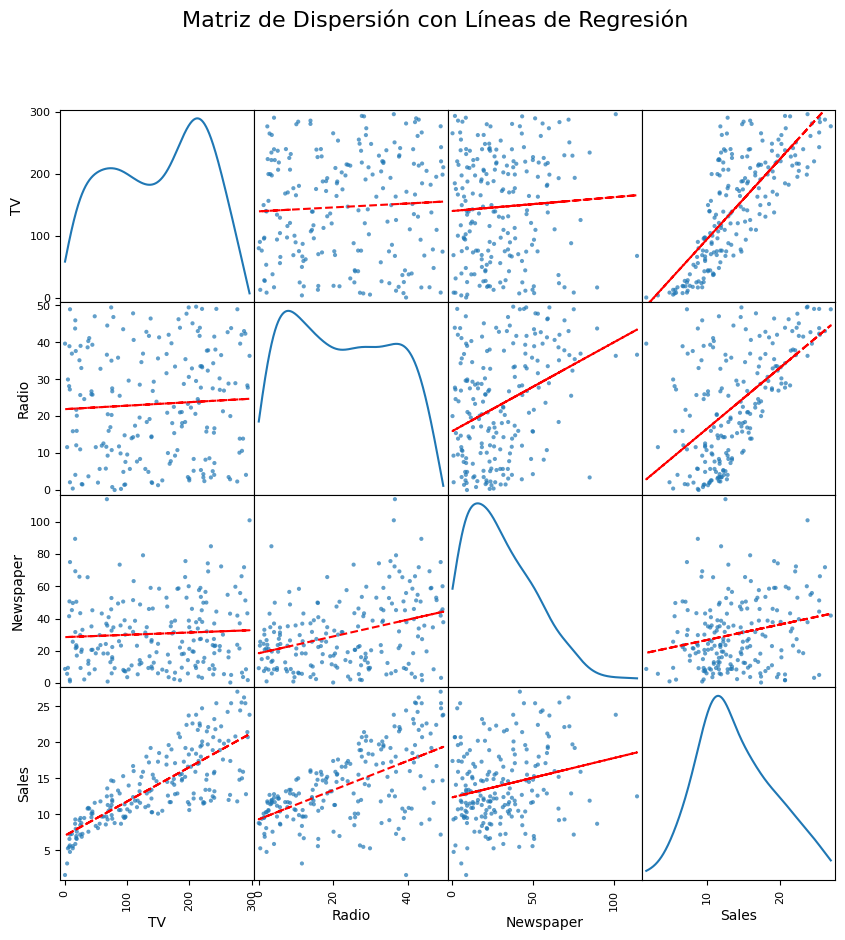

In [8]:
# Crear la scatter matrix
fig, axes = plt.subplots(nrows=len(df_filtro.columns), ncols=len(df_filtro.columns), figsize=(10, 10))
scatter_matrix(df_filtro, alpha=0.7, ax=axes, diagonal='kde')

# Trazar líneas de regresión en cada gráfico
for i in range(len(df_filtro.columns)):
    for j in range(len(df_filtro.columns)):
        if i != j:
            ax = axes[i, j]  # Acceder al eje correspondiente
            # Calcular la regresión lineal
            x = df_filtro.iloc[:, j]
            y = df_filtro.iloc[:, i]
            m, b = np.polyfit(x, y, 1)  # m: pendiente, b: intersección
            ax.plot(x, m * x + b, color='red', linestyle='--')  # Traza la línea de regresión

plt.suptitle('Matriz de Dispersión con Líneas de Regresión', fontsize=16)
plt.show()


# **Interpretación de los gráficos de las variables 2 a 2.**

Este coeficiente indica el cambio esperado en la variable dependiente por cada unidad de aumento en la variable independiente

**Sales VS TV:** Por cada aumento de una unidad en la variable 'X' (TV) se espera que en la variable 'Y' (Sales) aumente en 0.048 unidades.

**Sales VS Radio:** Por cada aumento de una unidad en la variable 'X' (Radio) se espera que en la variable 'Y' (Sales) aumente en 0.202 unidades.

**Sales VS Newspaper:** Por cada aumento de una unidad en la variable 'X' (Newspaper) se espera que en la variable 'Y' (Sales) aumente en 0.055 unidades.


# ***2)  CALCULAR COEFICIENTE DE CORRELACIÓN.***

***Coeficiente de correlación de Pearson***
$$
r = \frac{n(\sum xy) - (\sum x)(\sum y)}{\sqrt{[n\sum x^2 - (\sum x)^2][n\sum y^2 - (\sum y)^2]}}
$$

In [9]:

# Definimos las variables a evaluar

x = df_filtro['TV']. values
y = df_filtro['Sales']. values

#///////////////////////////////////////////////////////////////////////////////////////////

# Calculamos la cantidad de registros del df (n)
n = len(df_filtro)

#///////////////////////////////////////////////////////////////////////////////////////////

# Multiplicamos los valores de las variables, ejemplo (x1 * y1), (x2 * y2) ..... (xn * yn)

# Calculamos (∑xy)

sumatoria_xy = df_filtro['TV'] * df_filtro['Sales']

# Sumamos los productos

sum_x_por_y = sumatoria_xy.sum()

#///////////////////////////////////////////////////////////////////////////////////////////

# Calculamos n(∑xy)

n_por_sum_xy = n * sum_x_por_y

#///////////////////////////////////////////////////////////////////////////////////////////

# Calculamos ∑x

sum_x = df_filtro['TV'].sum()

#///////////////////////////////////////////////////////////////////////////////////////////

# Calculamos ∑y

sum_y = df_filtro['Sales'].sum()

#//////////////////////////////////////////////////////////////////////////////////////////
#==========================================================================================
#//////////////////////////////////////////////////////////////////////////////////////////

# Calculamos ∑x^2

sumx_cuadrado = (df_filtro['TV'] ** 2).sum()

#//////////////////////////////////////////////////////////////////////////////////////////

# Calculamos (∑x)^2

sum_x_cuadrado = (sum_x)**2

#//////////////////////////////////////////////////////////////////////////////////////////

# Calculamos n * ∑x^2

n_por_sum_x_cuadrado = n * sumx_cuadrado

#//////////////////////////////////////////////////////////////////////////////////////////

# Calculamos ∑y^2

sumy_cuadrado = (df_filtro['Sales'] ** 2).sum()

#//////////////////////////////////////////////////////////////////////////////////////////

# Calculamos (∑y)^2

sum_y_cuadrado = (sum_y)**2

#//////////////////////////////////////////////////////////////////////////////////////////

# Calculamos n * ∑y^2

n_por_sum_y_cuadrado = n * sumy_cuadrado


#//////////////////////////////////////////////////////////////////////////////////////////
#==========================================================================================
#//////////////////////////////////////////////////////////////////////////////////////////

# Calculamos la ∑x * ∑y

sumx_por_sumy = sum_x * sum_y

# Calculamos n (∑xy) - (∑x)(∑y)

n_por_sum_xy_menos_sum_x_por_sum_y = n_por_sum_xy - sumx_por_sumy

#//////////////////////////////////////////////////////////////////////////////////////////
#==========================================================================================
#//////////////////////////////////////////////////////////////////////////////////////////

# Calculamos   n * ∑x2 − (∑x)2

n_por_sum_x_cuadrado_menos_sum_x_cuadrado = (n * sumx_cuadrado) - sum_x_cuadrado

#///////////////////////////////////////////////////////////////////////////////////////////

# Calculamos   n * ∑y2 − (∑y)2

n_por_sum_y_cuadrado_menos_sum_y_cuadrado = (n * sumy_cuadrado) - sum_y_cuadrado

#///////////////////////////////////////////////////////////////////////////////////////////
#==========================================================================================
#///////////////////////////////////////////////////////////////////////////////////////////

# Calculo de n * (∑xy) − (∑x)(∑y)

n_por_sum_xy_menos_sum_x_por_sum_y = n_por_sum_xy - sumx_por_sumy

#///////////////////////////////////////////////////////////////////////////////////////////

# calculo de [n∑x2−(∑x)2] [n∑y2−(∑y)2]

n_por_sum_x_cuadrado_menos_sum_x_cuadrado_por_n_por_sum_y_cuadrado_menos_sum_y_cuadrado = (n_por_sum_x_cuadrado_menos_sum_x_cuadrado * n_por_sum_y_cuadrado_menos_sum_y_cuadrado)


# Mostrar el resultado
#===================================================
#===================================================

print(f"n = {n}")
print(f"(∑xy) = {sum_x_por_y}")
print(f"n(∑xy) = {n_por_sum_xy}")

print(f"(∑x) = {sum_x}")
print(f"(∑y) = {sum_y}")

#===================================================
#===================================================

print(f"∑x^2 = {sumx_cuadrado}")
print(f"(∑x)^2 = {sum_x_cuadrado}")
print(f"n * ∑x^2 = {n_por_sum_x_cuadrado}")

print(f"∑y^2 = {sumy_cuadrado}")
print(f"(∑y)^2 = {sum_y_cuadrado}")
print(f"n * ∑y^2 = {n_por_sum_y_cuadrado}")

#===================================================
#===================================================

print(f"(∑x)(∑y) = {sumx_por_sumy}")
print(f"n∑x^2−(∑x)^2) = {n_por_sum_x_cuadrado_menos_sum_x_cuadrado}")
print(f"n∑y^2−(∑y)^2) = {n_por_sum_y_cuadrado_menos_sum_y_cuadrado}")

#===================================================
#===================================================

print(f"n(∑xy) − (∑x)(∑y) = {n_por_sum_xy_menos_sum_x_por_sum_y}")
print(f"n∑x^2−(∑x)^2) * n∑y^2−(∑y)^2 = {n_por_sum_x_cuadrado_menos_sum_x_cuadrado_por_n_por_sum_y_cuadrado_menos_sum_y_cuadrado}")


n = 200
(∑xy) = 482108.33999999997
n(∑xy) = 96421668.0
(∑x) = 29408.5
(∑y) = 2804.5
∑x^2 = 5791118.39
(∑x)^2 = 864859872.25
n * ∑x^2 = 1158223678.0
∑y^2 = 44743.25
(∑y)^2 = 7865220.25
n * ∑y^2 = 8948650.0
(∑x)(∑y) = 82476138.25
n∑x^2−(∑x)^2) = 293363805.75
n∑y^2−(∑y)^2) = 1083429.75
n(∑xy) − (∑x)(∑y) = 13945529.75
n∑x^2−(∑x)^2) * n∑y^2−(∑y)^2 = 317839074722771.06


***Coeficiente de correlación de Pearson***

$$
r = \frac{n(\sum xy) - (\sum x)(\sum y)}{\sqrt{[n\sum x^2 - (\sum x)^2][n\sum y^2 - (\sum y)^2]}}
$$    .



---


**Reemplazamos la fórmula con su valor calculado**


---
.


$$
r = \frac{200(482108.339999999977) - (29408.5)(2804.5)}{\sqrt{[200(5791118.39) - (29408.5)^2][200(44743.25) - (2804.5)^2]}}
$$    
.

$$
r = \frac{96421668.0 - 82476138.25}{\sqrt{[1158223678.0 - 864859872.25][8948650.0 - 7865220.25]}}
$$    
.
$$
r = \frac{13945529.75}{\sqrt{[293363805.75][1083429.75]}}
$$    
.
$$
r = \frac{13945529.75}{\sqrt{[317839074722771.06]}}
$$   
.
$$
r = \frac{13945529.75}{17828041.81}
$$  
.
$$
r = 0.7822244248
$$  


**Ahora, vamos a comprobar si coincide con el valor calculado por medio de la función de NumPy => np.corrcoef(x, y)[0, 1]**

In [10]:
# agregamos las variables TV VS SALES

x = df_filtro['TV']. values
y = df_filtro['Sales']. values

# Calcular el coeficiente de correlación
correlation_coefficient = np.corrcoef(x, y)[0, 1]
print(f"Coeficiente de correlación: {correlation_coefficient}")

Coeficiente de correlación: 0.7822244248616061


**Igualmente, vamos a calcular el coeficiente de correlación para las variables RADIO y NEWSPAPER**

In [11]:
# agregamos las variables RADIO VS SALES

x = df_filtro['Radio']. values
y = df_filtro['Sales']. values

# Calcular el coeficiente de correlación
correlation_coefficient = np.corrcoef(x, y)[0, 1]
print(f"Coeficiente de correlación: {correlation_coefficient}")

Coeficiente de correlación: 0.5762225745710551


In [12]:
# agregamos las variables NEWSPAPER VS SALES

x = df_filtro['Newspaper']. values
y = df_filtro['Sales']. values

# Calcular el coeficiente de correlación
correlation_coefficient = np.corrcoef(x, y)[0, 1]
print(f"Coeficiente de correlación: {correlation_coefficient}")

Coeficiente de correlación: 0.22829902637616528


***Con los resultados obtenidos en el cálculo del coeficiente de correlación podemos concluir que:***


**TV vs SALES :** Un coeficiente del 0.78 indica que existe una correlación positiva y muy fuerte entre las 2 variables, a medida que una variable aumenta, la otra variable tambien tiende a aumentar.

**RADIO vs SALES :** Un coeficiente del 0.57 indica que existe una correlación positiva moderada entre las 2 variables, a medida que una variable aumenta, la otra variable tambien tiende a aumentar aunque su relación no es muy fuerte  como la de las variables TV vs SALES.

**NEWSPAPER vs SALES :** Un coeficiente del 0.23 indica que existe una correlación positiva muy débil entre las 2 variables, hay una ligera tendencia donde a medida que una variable aumenta, la otra variable tambien.

# **Graficamos mapa de calor de las correlaciones**

Vamos a comparar los mapas de calor que muestran las correlaciones entre los métodos de Pearson, Kendall y Spearman

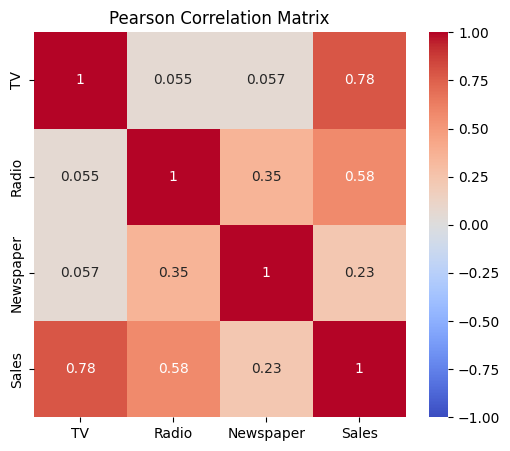

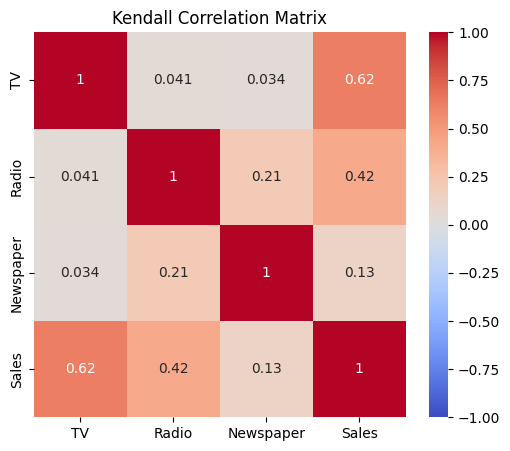

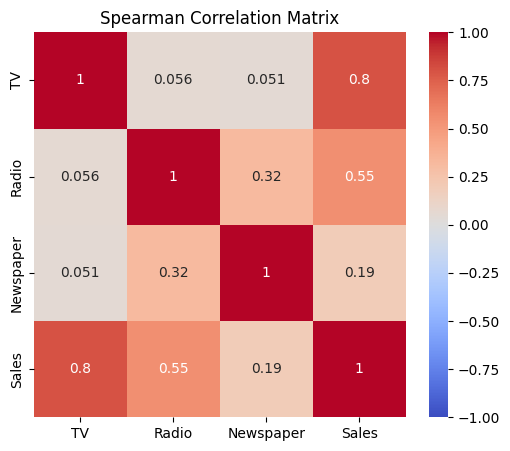

In [13]:
# Pearson correlation matrix
pearson_corr = df_filtro.corr(method='pearson')

# Kendall correlation matrix
kendall_corr = df_filtro.corr(method='kendall')

# Spearman correlation matrix
spearman_corr = df_filtro.corr(method='spearman')

#=========================================================================
# Imprimimos las matrices de correlación

plt.figure(figsize=(6, 5))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix')
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Kendall Correlation Matrix')
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Matrix')
plt.show()

# **Interpretamos las estructuras de dependencia encontradas**

**Método Pearson:** Este método mide la relación lineal entre dos variables. Como resultado según el mapa de calor, podemos observar que la relación entre las variables Sales VS TV es positiva, es decir, hay una relación fuerte porque el valor es muy cercano a 1 (0.78). La relación Sales VS Radio tambien es positiva pero moderada porque su valor es mas lejano a 1 (0.58). La relación Sales VS Newspaper es positiva pero muy débil (0.23).

**Método Kendall:** Sales VS TV (0.62). La relación es positiva y moderadamente fuerte, eso quiere decir que, a medida que las ventas aumentan, tambien lo esta haciendo la inversión en televisión aunque no es tan fuerte como el método de Pearson. Sales VS Radio (0.42). La relación es positiva y moderada, esto nos indica que hay una relación más debil entre las ventas y publicidad en radio al compararlo con la publicidad en televisión. Sales VS Newspaper (0.13). Esta relación es positiva pero muy débil lo que indica que no hay mucha correlación entre las ventas y la publicidad en periódicos.

**Método Spearman:** Sales VS TV (0.8). Este resultado indica una relación positiva muy fuerte. Cuando las ventas aumentan, la inversión en televisión tambien tiende a aumentar de manera consistente. Sales VS Radio (0.55). La relación es positiva y moderada, hay una relación más débil entre las ventas y publicidad en radio al compararlo con la publicidad en televisión. Sales VS Newspaper (0.19). Esta relación es positiva pero muy débil lo que indica que no hay mucha correlación entre las ventas y la publicidad en periódicos, igual que con los métodos de Kendall y Pearson.

**Conclusiones**: Se puede observar que la relación Sales VS TV es la más fuerte en los 3 métodos utilizados (Pearson, Kendall,Spearman ) lo que nos indica que es un canal de publicidad muy efectivo para impulsar las ventas. La relación Sales VS Newspaper es la mas débil en cualquiera de los 3 métodos lo que indica que la publicidad en periódicos no tiene un impacto significativo en las ventas.

# ***3. ESCOGER UNA DE LAS 3 VARIABLES PARA MODELAR LAS VENTAS.***

# ***Variable seleccionada: TV***

**Ajustar el modelo de regresión lineal simple y encontrar la ecuación de la recta**

Ecuación de la recta: Y = 7.03 + 0.05X
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           1.47e-42
Time:                        19:16:02   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

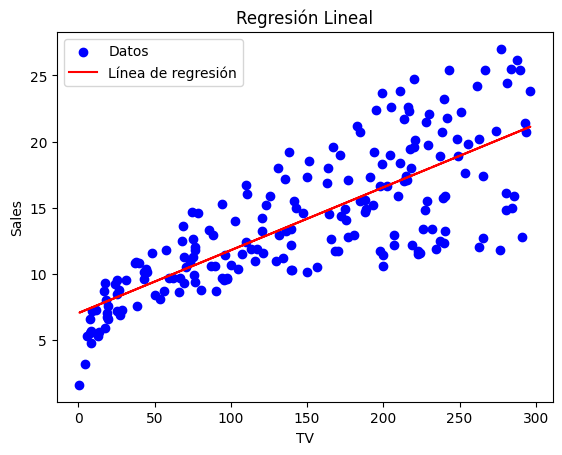

In [14]:
X = sm.add_constant(df_filtro['TV']) # variable independiente, predictora
Y = df_filtro['Sales'] # variable dependiente

# Para este ajuste, vamos a usar el método de minimos cuadrados ordinarios (OLS)

model = sm.OLS(Y, X).fit()
intercepto = model.params.iloc[0]
pendiente = model.params.iloc[1]
print(f'Ecuación de la recta: Y = {intercepto:.2f} + {pendiente:.2f}X')
print('======================================================================')
print(model.summary())

# Graficar los datos y la línea de regresión
plt.scatter(df_filtro['TV'], df_filtro['Sales'], color='blue', label='Datos')
plt.plot(df_filtro['TV'], model.predict(X), color='red', label='Línea de regresión')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Regresión Lineal')
plt.legend()
plt.show()

El **$R^2$** del modelo es  **0.612**, es decir, que la variabilidad de las ventas esta explicada en un 61.2% por el modelo. Por lo tanto el modelo se ajusta relativamente bien.

# **4. REALIZAR UNA PREDICCIÓN DEL ENTORNO A LA INVERSIÓN AL REALIZAR 5 ANUNCIOS.**



# **¿Cuál es el intervalo de confianza del 95% para la predicción?**

In [15]:
# Valor para el que queremos hacer la predicción

df_prd = pd.DataFrame({'const': 1, 'TV': [5]}) # 5 anuncios en TV

# Realizar la predicción y obtener el intervalo de confianza

prediccion = model.get_prediction(df_prd)
resumen_prediccion = prediccion.summary_frame(alpha=0.05) # Intervalo de confianza del 95%

# Mostrar resultados
print(f"Predicción de ventas: {resumen_prediccion['mean'][0]:.2f}")
print(f"Intervalo de confianza del 95%: ({resumen_prediccion['mean_ci_lower'][0]:.2f}, {resumen_prediccion['mean_ci_upper'][0]:.2f})")



Predicción de ventas: 7.27
Intervalo de confianza del 95%: (6.39, 8.15)


El intervalo de confianza del **95%** para la predicción es de 6.39 a 8.15. Es decir que la predicción de 5 anuncios generaria con un 95% de seguridad entre 6.39 y 8.15 ventas